# Employment DATA EDA

This file aims to show the logic behind cleaning employment data.

First, let's load some libraries

In [1]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

## load data frame

In [18]:
df = pd.read_excel('data/employment/GSS.xls')

In [19]:
df.head(1)

,Gss year for this respondent,Respondent id number,Labor force status,Number of hours worked last week,Number of hours usually work a week,Marital status,Respondents sex,Household members less than 6 yrs old,Household members 6 thru 12 yrs old,Household members 13 thru 17 yrs old,Household members 18 yrs and older,General happiness
0,1994,2,Working fulltime,40,Not applicable,Married,Male,0,0,0,2,Very happy


column names are long. use extract_variables function to extract variables. Then replace the columns names replece function.  **Need to incorprate this into data process class function**

In [20]:
variables = extract_variables('data/employment/GSS.sps')
replace_variables(df,variables)

In [21]:
df.head(1)

,year,id_,wrkstat,hrs1,hrs2,marital,sex,babies,preteen,teens,adults,happy
0,1994,2,Working fulltime,40,Not applicable,Married,Male,0,0,0,2,Very happy


## EDA

In [7]:
df.shape

(30213, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30213 entries, 2 to Data collection: General Social Survey
Case Selection: (Combined.year >= 1994 AND Combined.year <= 2014)
Data columns (total 11 columns):
year       30212 non-null object
wrkstat    30211 non-null object
hrs1       30211 non-null object
hrs2       30211 non-null object
marital    30211 non-null object
sex        30211 non-null object
babies     30211 non-null object
preteen    30211 non-null object
teens      30211 non-null object
adults     30211 non-null object
happy      30211 non-null object
dtypes: object(11)
memory usage: 2.8+ MB


In [9]:
df.wrkstat.value_counts(dropna=False)

Working fulltime    15421
Retired              4622
Keeping house        3354
Working parttime     3285
Unempl, laid off     1136
School                981
Other                 782
Temp not working      614
No answer              16
NaN                     2
Name: wrkstat, dtype: int64

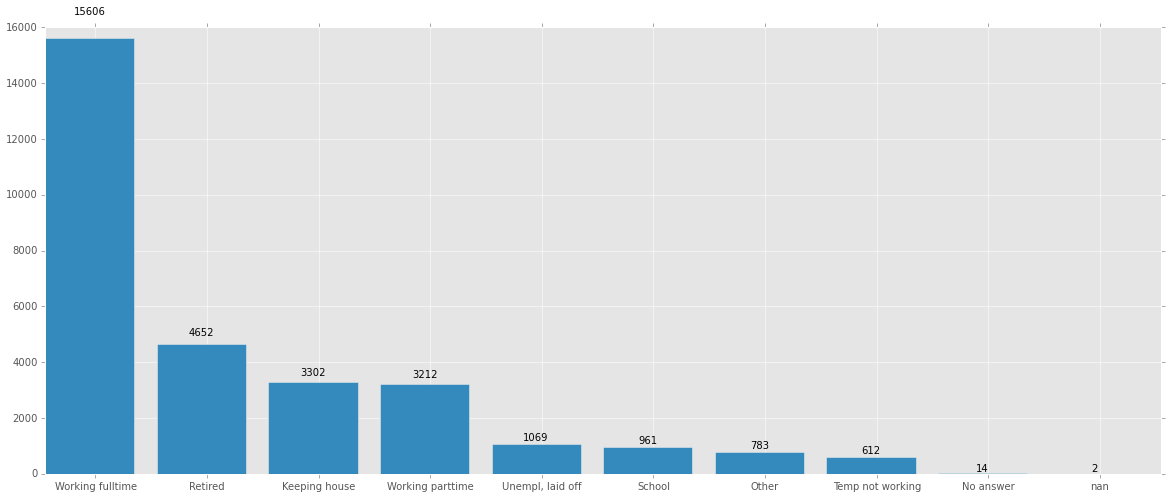

In [42]:
simple_bar(df.wrkstat,(20,8))

### Retired and school population are not group of interest for this study. Drop the retired and school rows.

In [59]:
df = df[df.wrkstat.apply(lambda x: x not in ['School','Retired'])]
df.shape

(24610, 12)

In [65]:
temp = df[df.hrs1=='Not applicable']

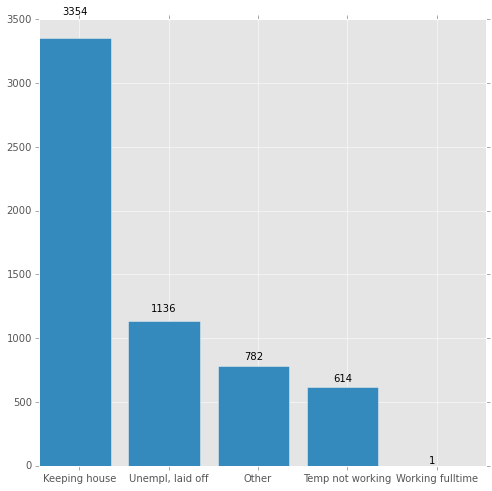

In [66]:
simple_bar(temp.wrkstat)

## Respondents who filled hrs1 "not applicable" are not working, so we can set "not applicable" as 0. Same will be applied to hrs 2

In [72]:
df['hrs1'].replace('Not applicable',0,inplace = True)

/Users/yleng/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [84]:
df['hrs1'].unique()

array([40, 20, 35, 75, 0, 70, 48, 16, 51, 30, 37, 89, 38, 60, 80, 50, 25,
       55, 10, 44, 7, 36, 13, u'No answer', 33, 24, 45, 65, 23, 57, 58, 32,
       34, 43, 19, 6, 8, 49, 47, 26, 39, 42, 28, 76, 22, 46, 41, 56, 15,
       72, 54, 52, 14, 53, 31, u"Don't know", 3, 67, 12, 84, 4, 62, 29, 5,
       9, 82, 2, 27, 59, 18, 79, 85, 21, 17, 64, 68, 63, 11, 1, 66, 73, 74,
       61, 86, 87, 83, 69, 78, 77, 71, 88, nan], dtype=object)

## replace "no answer" and "dont know" with np.nan

In [85]:
df['hrs2'].replace('Not applicable', 0, inplace = True)

In [108]:
df[df.hrs1=="Don't know"]['hrs2'].unique()

array([0], dtype=object)

In [122]:
df.hrs1.replace(["Don't know","No answer"], np.nan, inplace=True)

In [124]:
df.hrs2.replace('No answer',np.nan, inplace=True)

In [137]:
df[['hrs1','hrs2']].apply(lambda x: x!=0).sum(axis = 1).argmax()

278

In [138]:
df.ix[278]

year             1994
id_               799
wrkstat     No answer
hrs1              NaN
hrs2              NaN
marital     No answer
sex            Female
babies              0
preteen             0
teens               0
adults              1
happy      Don't know
Name: 278, dtype: object

## hrs1 and hrs2 are not 0 at same time. we can combine them by adding them up, elementwise. then drop hrs2

In [144]:
df['whrs'] = df['hrs1'].values +df['hrs2'].values


/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## fill whrs nan with column mean

In [145]:
df.whrs.fillna(df.whrs.mean(),inplace= True)

/Users/yleng/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## drop hrs1,hrs2

In [147]:
df.drop(['hrs1','hrs2'],axis=1,inplace=True)

/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Now let's look at matrial status

In [154]:
df.marital.value_counts()

Married          12181
Never married     6393
Divorced          3949
Widowed           1185
Separated          889
No answer           11
Name: marital, dtype: int64

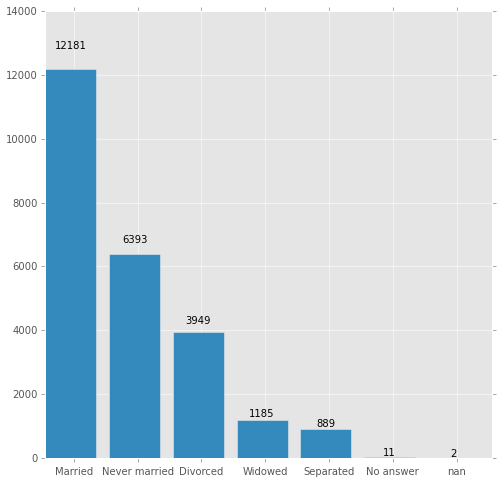

In [156]:
simple_bar(df.marital)

For now, split respondent into married and not married 

In [167]:
df['married'] = df.marital.apply(lambda x: x=="Married")

/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


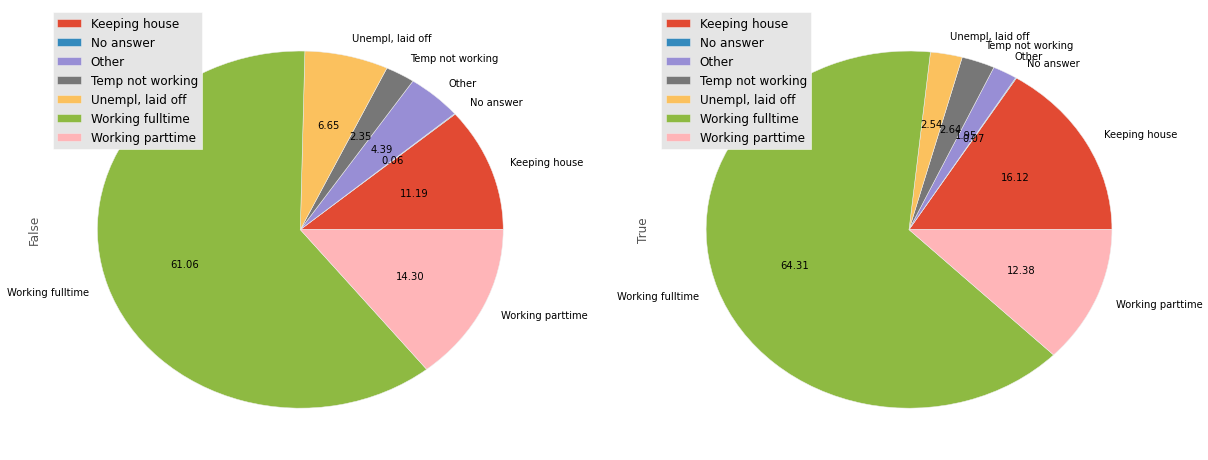

In [168]:
pie_chart(df.married,df.wrkstat)

## will dummie this column eventually, no need to create new columns from this.